In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 12})  
mpl.rcParams['font.family'] = 'Times New Roman'
save_path_ablation = '../figures/ablation' # 保存路径
os.makedirs(save_path_ablation, exist_ok=True)

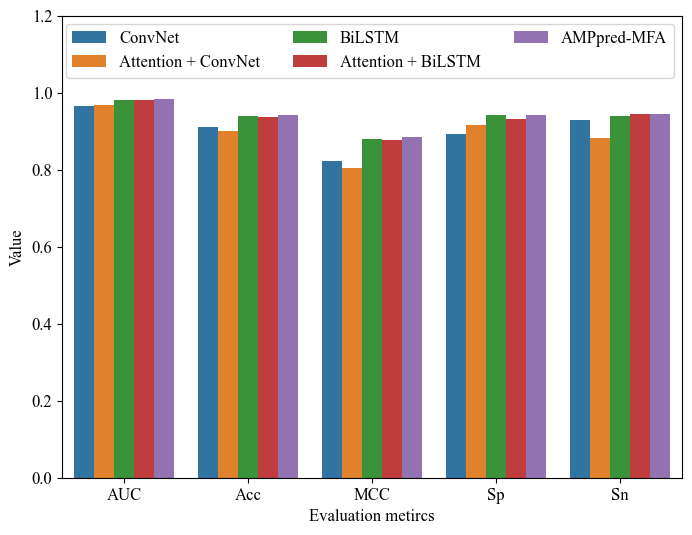

In [2]:
def plot_ablation_attention(filepath):
    # 读取数据
    data = pd.read_excel(filepath)
    # 不考虑误差
    for col in data.columns[1:]:
        data[col] = data[col].str.split(' ± ').str[0].astype(float)
    # 转换数据为长格式（以便于使用 seaborn 绘图）
    data_melted = pd.melt(data, id_vars=["Method"], var_name="Metircs", value_name="Value")
    # 绘制柱状图
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x="Metircs", y="Value", hue="Method", data=data_melted)
    # 绘制折线图
    # for col in data.columns[1:]:
    #     ax.plot(data["Method"], data[col],label = col)
    # 设置图形属性
    ax.set_xlabel("Evaluation metircs")
    ax.set_ylabel("Value")
    ax.set_ylim(top=1.2)
    ax.legend(ncol=3, loc="upper right")

    return fig


fig_ablation_attention = plot_ablation_attention('./result/k=1/ablation.xlsx')
fig_ablation_attention.savefig(
    os.path.join(save_path_ablation, 'ablation of attention.png'),
    dpi=300, 
    bbox_inches='tight'
)


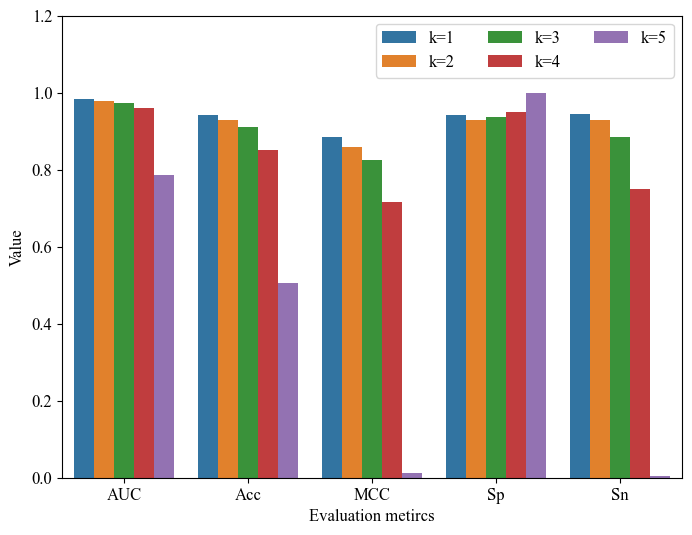

In [3]:
def plot_ablation_kmer(root_dir):
    lst_data = []
    for dir_name in os.listdir(root_dir):
        result_dir = os.path.join(root_dir,dir_name)
        if os.path.isdir(result_dir):
            result_path = os.path.join(result_dir, 'ablation.xlsx')
            df_tmp = pd.read_excel(result_path).iloc[-1].tolist()[1:]
            df_tmp.insert(0, dir_name)
            lst_data.append(df_tmp)
            # df_data.loc[len(df_data.index)] = [df_tmp.tolist()]
    df_data = pd.DataFrame(lst_data,columns=['k-mer','AUC','Acc','MCC','Sp','Sn'])
    # 不考虑误差
    for col in df_data.columns[1:]:
        df_data[col] = df_data[col].str.split(' ± ').str[0].astype(float)
    data_melted = pd.melt(df_data, id_vars=["k-mer"], var_name="k-mer1", value_name="value")
    data_melted
    # 绘制柱状图
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x="k-mer1", y="value", hue="k-mer", data=data_melted)
    # 绘制折线图
    # for col in data.columns[1:]:
    #     ax.plot(data["Method"], data[col],label = col)
    # 设置图形属性
    ax.set_xlabel("Evaluation metircs")
    ax.set_ylabel("Value")
    ax.set_ylim(top=1.2)
    ax.legend(ncol=3, loc="upper right")
    return fig

fig_ablation_kmer = plot_ablation_kmer('./result/')
fig_ablation_kmer.savefig(
    os.path.join(save_path_ablation, 'ablation of k-mer.png'),
    dpi=300, 
    bbox_inches='tight'
)
